**计算物理学(A)作业2：微分和积分**

姓名：刘思瑞

学号：2100017810

注意：请使用Python语言完成所有编程作业。允许并鼓励同学间合作，但严禁抄袭别人的代码，且严谨直接抄袭ChatGPT的代码；请直接在题干后附加代码块和必要的公式，讨论等；作图请包含x,y轴label，以及必要的图例。过多信息的缺失可能会导致丢分。

作业提交只需直接提交这个完成后的jupyter notebook，并命名为"姓名-学号-作业x"。

另外请在作业最后**简要说明本次作业完成情况**，以及大致心路历程(示例：共3小时，其中第一题1小时比较顺利，第二题遇到了xxx坑，调了一会找xxx同学讨论了一下，2小时调好了xxx的bug)；另外标注**致谢**，借助了哪位同学/ChatGPT等工具的帮助，如果自己独立完成的，只需标注"独立完成"。如果上述备注有缺失，会导致作业扣分！

本次作业额外注意事项：请勿直接调用`numpy.polynomial.legendre`获得高斯积分的权重。

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

**1 微分的精度问题**

本练习想要表达的核心思想是，切的要细，但不能太细了。

**(a)** 考虑函数$f(x)=e^{-x^2}$. 请利用两种微分估算方法$f'(x)=\frac{f(x+dx)-f(x)}{dx}$ (forward difference) 和$f'(x)=\frac{f(x+dx/2)-f(x-dx/2)}{dx}$ (central difference)，对于$dx=10^{-1}, 10^{-2}, ... 10^{-12}$ 计算$f'(1)$的值，并和实际值对比，作图讨论你的结果的定性行为。

**(b)** 下面我们考虑高阶导数。对于函数$g(x)=e^{2x}$，请使用$g'(x)=\frac{g(x+dx/2)-g(x-dx/2)}{dx}$的思路编写递归函数，对于$dx=10^{-1}, 10^{-2}, ... 10^{-10}$计算$g(x)$在$x=0$处的前10阶导数，并和实际值对比，选取有代表性的$dx$作图讨论你的结果的定性行为。



**(a)**

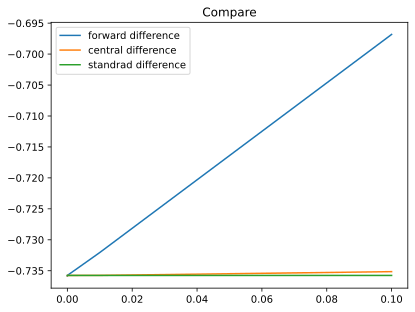

In [3]:
import math
def fd(dx):
    return((math.exp(-(1+dx)**2)-math.exp(-(1)**2))/dx)

def cd(dx):
    return((math.exp(-(1+dx/2)**2)-math.exp(-(1-dx/2)**2))/dx)

x = []
for i in range(1,13):
    x.append(10**(-i))
yf = [fd(i) for i in x]
yc = [cd(i) for i in x]
y = [-2*math.exp(-1) for i in x]
plt.plot(x,yf,label="forward difference")
plt.plot(x,yc,label="central difference")
plt.plot(x,y,label="standrad difference")
plt.title("Compare")
plt.legend()


可以看出中心差分的收敛更快，这应该是因为该函数的导数变化迅速，如果向前差分的话就会得到一个更大的导数（中值定理）

**(b)**

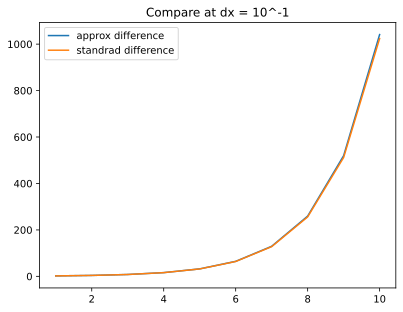

In [4]:
def high(dx,n,x):
    if n == 0:
        return math.exp(2*x)
    return (high(dx,n-1,x+dx/2)-high(dx,n-1,x-dx/2))/dx

x = [i for i in range(1,11)]
yf = [high(0.1,i,0) for i in x]
y = [(2**i) for i in x]
plt.plot(x,yf,label="approx difference")
plt.plot(x,y,label="standrad difference")
plt.title("Compare at dx = 10^-1")
plt.legend()

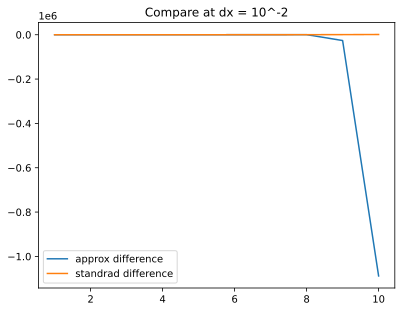

In [5]:
yf = [high(0.01,i,0) for i in x]
plt.plot(x,yf,label="approx difference")
plt.plot(x,y,label="standrad difference")
plt.title("Compare at dx = 10^-2")
plt.legend()

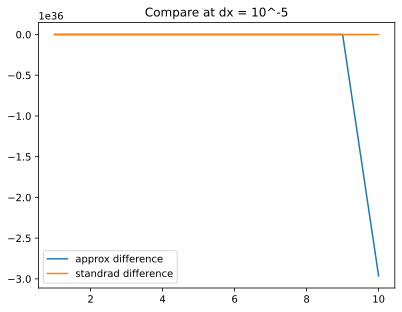

In [6]:
yf = [high(0.00001,i,0) for i in x]
plt.plot(x,yf,label="approx difference")
plt.plot(x,y,label="standrad difference")
plt.title("Compare at dx = 10^-5")
plt.legend()

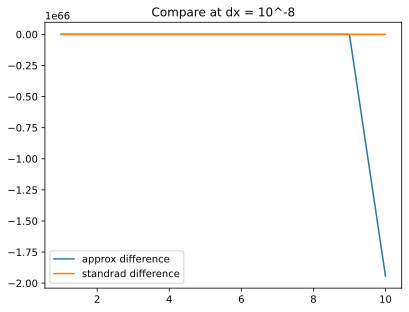

In [7]:
yf = [high(0.00000001,i,0) for i in x]
plt.plot(x,yf,label="approx difference")
plt.plot(x,y,label="standrad difference")
plt.title("Compare at dx = 10^-8")
plt.legend()

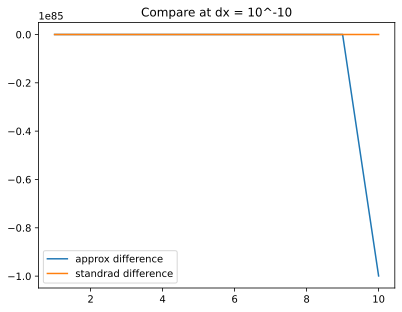

In [8]:
yf = [high(0.0000000001,i,0) for i in x]
plt.plot(x,yf,label="approx difference")
plt.plot(x,y,label="standrad difference")
plt.title("Compare at dx = 10^-10")
plt.legend()

可以看到随着微分的变小，高阶导数发散了，这是因为越高阶变化越迅速，选取同样的dx无法收敛

**2 圆孔衍射与Bessel函数**

在光学课我们学过，圆孔衍射的图样是和Bessel函数有关的艾里斑。下面我们使用数值方法进行相关作图。

**(a)** 首先考虑整数 $m$ 阶Bessel函数 $J_m(x)$ 的积分形式

$$
J_m(x) = \frac{1}{\pi}\int_0^\pi \cos(m\theta - x\sin\theta) \text{d}\theta
$$

请使用Simpson方法选取合理的（你喜欢的）积分步长，作出$x\in [0, 20]$区间的$J_0(x), J_1(x), J_2(x)$。并且在另一张图里利用`scipy.special.jv`做出参考值$J_0(x), J_1(x), J_2(x)$，说服你自己你算出来的结果是对的。

**(b)** 对于圆孔衍射，二维衍射图样的衍射强度为
$$
I(r)/I_0 = \left(\frac{J_1(kr)}{kr} \right)^2
$$

其中$k=2\pi/\lambda$是波矢，$r^2=x^2+y^2$。请对于$\lambda=500\text{nm}$的入射光，画出$x\in[-1, 1]\mu \text{m}, y\in[-1, 1]\mu \text{m}$范围内的光强图样，这就是著名的艾里斑。

**Hint:** 请注意补全图例，colorbar，xlabel，ylabel等必要的信息；`plt.imshow`是对于可视化二维数组的一个很方便的办法。

**(a)**

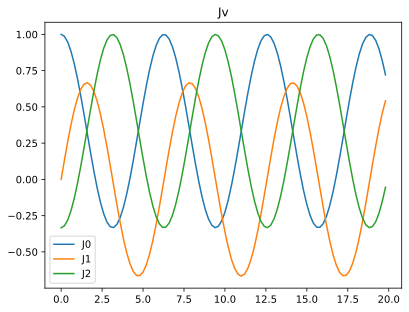

In [9]:
def J(m,x,t):
    return (1/math.pi)*math.cos(m*t-x*math.sin(t))
def simp(a,b,m,x):
    return ((b-a)/6) * (J(m,x,a)+4*J(m,x,(a+b)/2)+J(m,x,b))
x = np.arange(0,20,0.2)
y1 = [simp(0,math.pi,0,i) for i in x]
plt.plot(x,y1,label="J0")
plt.title("J0")
y2 = [simp(0,math.pi,1,i) for i in x]
plt.plot(x,y2,label="J1")
plt.title("J1")
y2 = [simp(0,math.pi,2,i) for i in x]
plt.plot(x,y2,label="J2")
plt.title("Jv")
plt.legend()

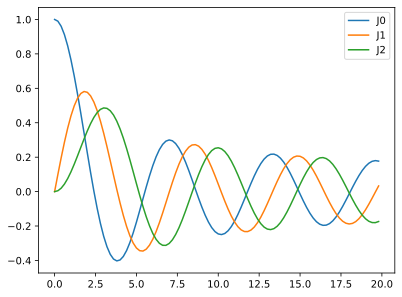

In [10]:
import scipy.special

plt.plot(x,scipy.special.jv(0,x),label="J0")
plt.plot(x,scipy.special.jv(1,x),label="J1")
plt.plot(x,scipy.special.jv(2,x),label="J2")
plt.legend()

差别很大，因为simpson取的中点对x有周期性

**(b)**


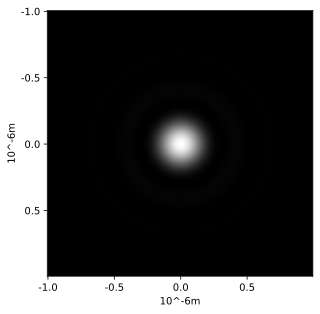

In [11]:
import matplotlib
x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)
I = []
for i in range(len(x)):
    I.append([0]*len(x))
for i in range(len(x)):
    for j in range(len(y)):
        r = math.sqrt(x[i]**2+y[j]**2)
        I[i][j] = (scipy.special.jv(1,4*math.pi*r)/(4*math.pi*r))**2

plt.xticks(np.arange(0,200,50),np.arange(-1,1,0.5))
plt.yticks(np.arange(0,200,50),np.arange(-1,1,0.5))
plt.xlabel('10^-6m')
plt.ylabel('10^-6m')
plt.imshow(I,cmap='gray')



**3 高斯积分法实战**

我们考虑相对论情形下的一维谐振子：
$$E=\frac{mc^2}{\sqrt{1-v^2/c^2}}+\frac 12 kx^2 $$
整理得到
$$
  v^2=c^2\left[1-\left(\frac{mc^2}{E-kx^2/2}\right)^2\right].
$$
假设初始条件下粒子静止在 $x=x_0$，于是总能量为 $E=mc^2+\frac 12 kx_0^2$；利用$v=dx/dt$可以得到谐振子的振动周期
$$
  T = 4\int_0^{x_0}\frac{d x'}{v(x')},\quad v(x)=\frac{dx}{dt}=c\left\{\frac{k\left(x_0^2-x^2\right)\left[2mc^2 + k\left(x_0^2-x^2\right)/2\right]}{2\left[mc^2 + k\left(x_0^2-x^2\right)/2\right]^2}\right\}^{1/2}
$$

从物理上，对于非相对论极限，振动周期与$x$无关：$T=2\pi \sqrt{m/k}$；对于相对论极限，速度基本都是$c$，于是$T=4x_0/c$。

本问题的目标也很简单，就是使用高斯积分把这个$T$积分的普遍值积出来。

**(a)** 阅读助教在接下来的代码块里提供的函数，请参考讲义，并尽量不参考ChatGPT，描述函数`gaussxw`和`gaussxwab`的功能，但不必描述实现原理；理论上调用这些函数就可以很容易得到本题的结果。当然，如果你决定自己从头写一遍此任务，可以忽略此问；**Hint**：如果对原理感兴趣，可以参考以下网址 https://rosettacode.org/wiki/Numerical_integration/Gauss-Legendre_Quadrature

**(b)** 使用你读懂了的这些代码，合理调用`gaussxwab`函数进行上述积分计算周期$T$；使用参数为：$m=1$ kg, $k=12$ N/m, 对于初始振幅$x_0$从$0$到$10^{9}$ m的范围取点画出$T$随$x_0$变化的曲线。另外请在图中标出非相对论和相对论极限，验证曲线两端渐进行为的正确性。

In [12]:
def gaussxw(N):
    # Initial guess to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N, float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = N*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2/((1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

**(a)**

`gaussxw`用来寻找勒让德多项式的根以及高斯积分的权重，`gaussxwab`则是标准化到a、b之间

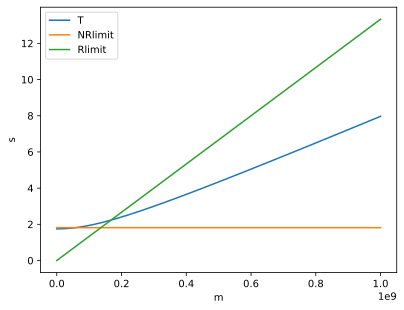

In [16]:
def f(x,x_0):
    c = 3e8
    k = 12
    m = 1
    return 4*(1/c)*((2*(m*c*c+(k*(x-x_0)**2)/2)**2)/(k*(x_0**2-x**2)*(2*m*c*c+(k*(x-x_0)**2)/2)))**0.5

x0 = np.arange(1,1e9,5000)
y = []
for i in x0:
    x,w = gaussxwab(10,0,i)
    temp = 0
    for j in range(len(x)):
        temp+= f(x[j],i)*w[j]
    y.append(temp)
plt.plot(x0,y,label='T')
plt.plot(x0,[math.pi/math.sqrt(3) for i in x0],label = 'NRlimit')
plt.plot(x0,[4*i/3e8 for i in x0],label = 'Rlimit')
plt.xlabel('m')
plt.ylabel('s')
plt.legend()

**作业完成情况**：大约两个小时左右，主要是艾里斑不会调坐标轴研究了很长时间

**致谢**：独立完成